In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection/SMSSpamCollection.tsv


In [187]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

df = pd.read_csv("../input/sms-spam-collection/SMSSpamCollection.tsv", sep='\t', names= ['label', 'message'])



# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plottig countplots for Spam vs. Ham

In [188]:
df.shape

(5568, 2)

In [189]:
df.columns

Index(['label', 'message'], dtype='object')

In [190]:
df.dtypes

label      object
message    object
dtype: object

In [191]:
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [192]:
df.tail()

,label,message
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...
5567,ham,Rofl. Its true to its name


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5568 non-null   object
 1   message  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [194]:
df.describe(include="object")

,label,message
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


***Note: No NaN values in the dataset***

In [195]:
#mapping the values for label
df['label']=df['label'].map({'ham':0, 'spam':1})

In [196]:
df.head()

,label,message
0,0,I've been searching for the right words to tha...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,"Nah I don't think he goes to usf, he lives aro..."
3,0,Even my brother is not like to speak with me. ...
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!


In [197]:
df.tail()

,label,message
5563,1,This is the 2nd time we have tried 2 contact u...
5564,0,Will ü b going to esplanade fr home?
5565,0,"Pity, * was in mood for that. So...any other s..."
5566,0,The guy did some bitching but I acted like i'd...
5567,0,Rofl. Its true to its name


In [198]:
#importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

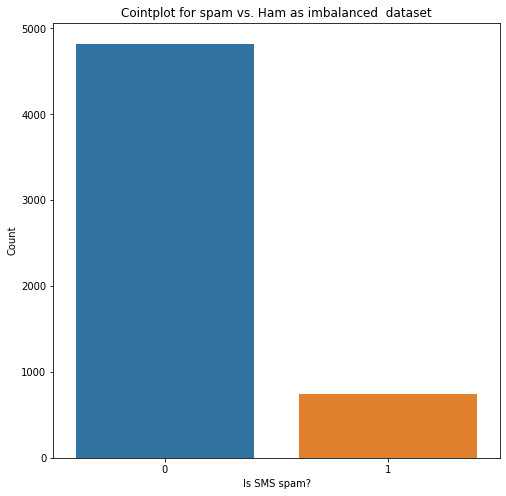

In [199]:
#countplot for spam  vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Cointplot for spam vs. Ham as imbalanced  dataset')
p = plt.xlabel('Is SMS spam?')
p = plt.ylabel('Count')

**Insight:** From above countplot, it is eviden t that the dataset is imbalanced

# Feature Engineering
* Handling imbalanced dataset using Oversampling
* Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc 

In [200]:
#Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))


Number of Spam records: 746
Number of Ham records: 4822


In [201]:
#Divide by class
df_ham = df[df['label']==0]
df_spam = df[df['label']==1]

In [202]:
df_ham.shape, df_spam.shape,



((4822, 2), (746, 2))

In [212]:
df_new_spam=df_spam.sample(len(df_ham), replace = True)
df_new_spam.shape

(4822, 2)

In [209]:
df = pd.concat([df_ham, df_new_spam], axis =0)

In [210]:
df.shape

(9644, 2)

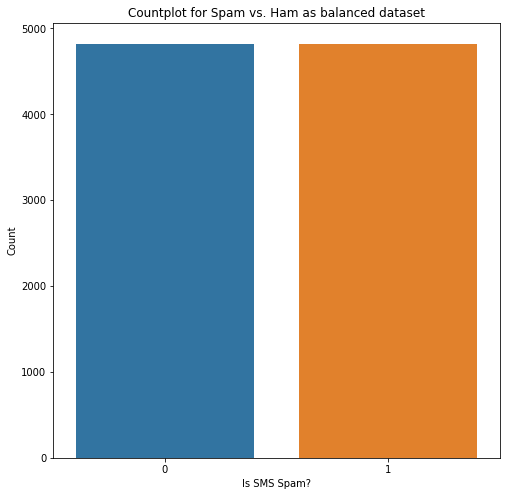

In [250]:

# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [213]:
#Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [214]:
df.head()

,label,message,word_count
0,0,I've been searching for the right words to tha...,37
2,0,"Nah I don't think he goes to usf, he lives aro...",13
3,0,Even my brother is not like to speak with me. ...,16
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,8
5,0,As per your request 'Melle Melle (Oru Minnamin...,26


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


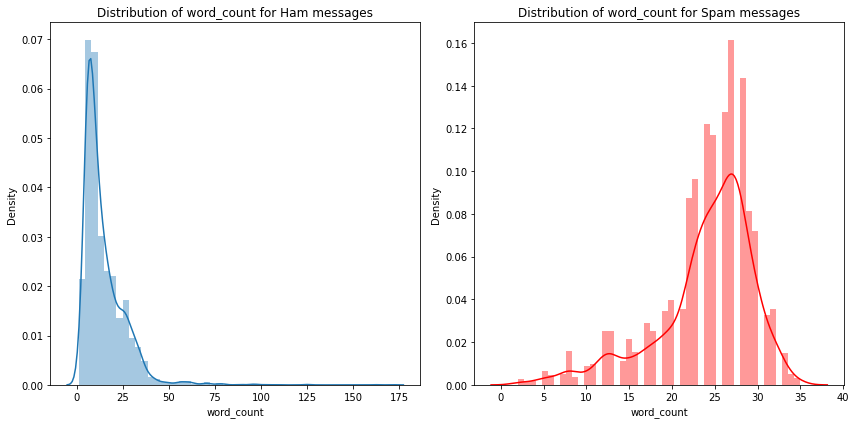

In [215]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

**Insight: Spam messages** worldcount fall in the range of **15-30 words**, whereas majority of the **Ham messages** fall in the range of **below 25 words **

In [217]:
#Creating festure contains_currency_symbol
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0
df['contains_currency_symbol'] = df['message'].apply(currency)

In [219]:
df.head()

,label,message,word_count,contains_currency_symbol
0,0,I've been searching for the right words to tha...,37,0
2,0,"Nah I don't think he goes to usf, he lives aro...",13,0
3,0,Even my brother is not like to speak with me. ...,16,0
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,8,0
5,0,As per your request 'Melle Melle (Oru Minnamin...,26,0


In [220]:
df.tail()

,label,message,word_count,contains_currency_symbol
5274,1,URGENT! Your Mobile number has been awarded wi...,23,1
4841,1,YOU HAVE WON! As a valued Vodafone customer ou...,25,1
2129,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,22,0
833,1,Do you want 750 anytime any network mins 150 t...,28,0
364,1,Here is your discount code RP176781. To stop f...,16,0


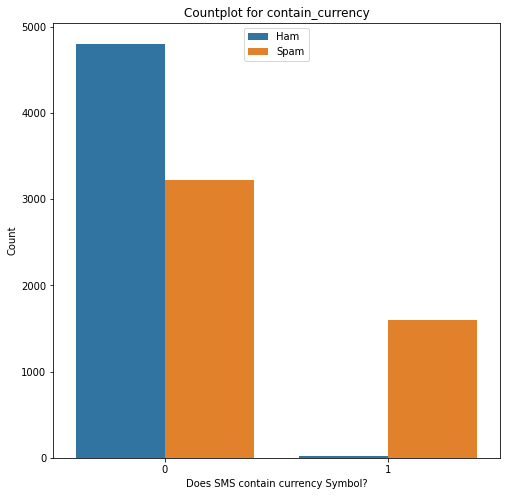

In [223]:
#countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g= sns.countplot(x='contains_currency_symbol', data= df, hue = 'label')
p =  plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency Symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

**Insght: Almost 1/3 of Spam messages contain currency symbols,** and currency symbols are rarely in Ham messages

In [224]:
#Creating feature contains_number
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0
df['contains_number']= df['message'].apply(numbers)

In [225]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,I've been searching for the right words to tha...,37,0,0
2,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
3,0,Even my brother is not like to speak with me. ...,16,0,0
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,8,0,0
5,0,As per your request 'Melle Melle (Oru Minnamin...,26,0,1


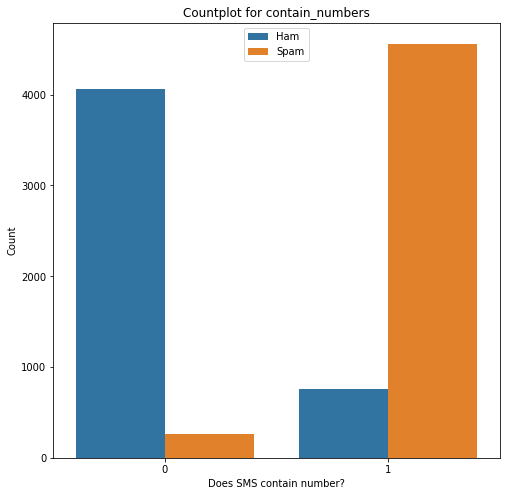

In [226]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)


**Insight: It is evident that most of the Spam messages contain numbers, and majority of the Ham messages donot contain numbers.**




# Data Cleaning
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages


In [227]:

# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [228]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [230]:
corpus[0:3]

['searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time',
 'nah think go usf life around though',
 'even brother like speak treat like aid patent']

In [232]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# 
# Model Building & Evaluation
**Metric: F1-Score**
* Multiomail Naive Bayes: 0.943
* **Decision Tree: 0.98**
* Random Forest (Ensemble): 0.994
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98



In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [234]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.942 ---
Standard Deviation: 0.014


In [236]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       992
           1       0.87      0.96      0.91       937

    accuracy                           0.91      1929
   macro avg       0.91      0.91      0.91      1929
weighted avg       0.91      0.91      0.91      1929



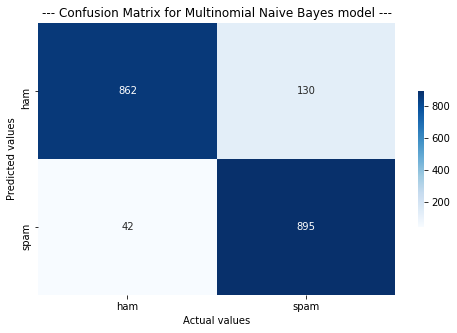

In [237]:

# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [238]:

# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.982 ---
Standard Deviation: 0.003


In [239]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       992
           1       0.97      1.00      0.98       937

    accuracy                           0.98      1929
   macro avg       0.98      0.98      0.98      1929
weighted avg       0.98      0.98      0.98      1929



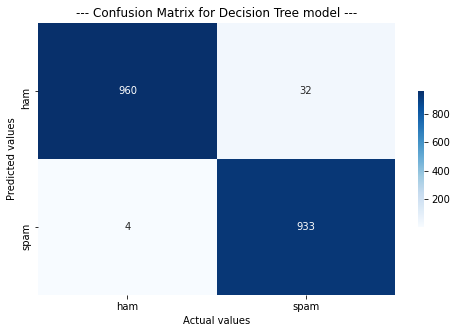

In [240]:

# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [241]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.994 ---
Standard Deviation: 0.002


In [242]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       992
           1       0.99      1.00      0.99       937

    accuracy                           0.99      1929
   macro avg       0.99      0.99      0.99      1929
weighted avg       0.99      0.99      0.99      1929



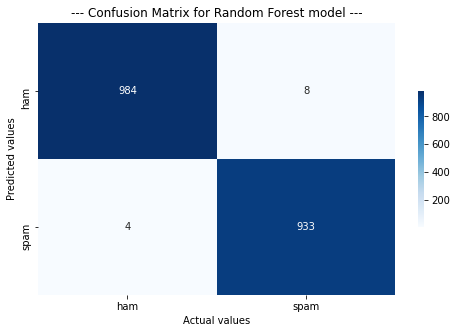

In [243]:

# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')


**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!

In [244]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.982 ---
Standard Deviation: 0.004


**Note: Voting algorithm did not out-perform Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.**

# Making Predictions

In [245]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)

In [246]:

# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [247]:

# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [248]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [249]:

# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.
